<a href="https://colab.research.google.com/github/erivetna87/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Eric_Rivetna_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-white')

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [0]:
# print(cell_phones.head())
# print('\n'
#       '\n')
# print(cell_phones.tail())


# print('\n'
#       '\n')

# print('{}{}'.format('POPULATION',200*'*'))
# print(population.head())
# print('\n'
#       '\n')
# print(population.tail())

# print('\n'
#       '\n')

# print('{}{}'.format('GEO',200*'*'))
# print(geo_country_codes.head())
# print('\n'
#       '\n')
# geo_country_codes.tail()

# geo_country_codes.columns.get_values().tolist()




### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [662]:
#Mere on columns geo and time
cellpopDF = cell_phones.merge(population,how='inner',left_on=['geo','time'],right_on=['geo','time'])
cellpopDF.shape
cellpopDF.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
#probably a better way via join formulas
geo_merge_subset = geo_country_codes[['geo','country']]

In [664]:
df = cellpopDF.merge(geo_merge_subset,how='inner',
                     left_on=['geo'],
                     right_on=['geo'])
df.shape


(8590, 5)

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [665]:


df.loc[(df['cell_phones_total'] > 0)]
df['cell_per_person'] = df['cell_phones_total'] / df['population_total'] 

#Finding 'United States' string formatting for solution
df[df['country'].str.contains('United')]

df.loc[(df['cell_phones_total'] > 0) & (df['time'] == 2017) & (df['country'] == 'United States')]

,geo,time,cell_phones_total,population_total,country,cell_per_person
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
df['geo'] = df['geo'].str.upper()


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [667]:
df.dtypes

geo                   object
time                   int64
cell_phones_total    float64
population_total       int64
country               object
cell_per_person      float64
dtype: object

In [668]:
numeric_describe = df.describe(include=[np.number]).round(2)
#Time min is 1960 max is 2017
numeric_describe

,time,cell_phones_total,population_total,cell_per_person
count,"8,590.0","8,590.0","8,590.0","8,590.0"
mean,"1,994.19","9,004,949.64","29,838,230.58",0.28
std,14.26,"55,734,084.87","116,128,377.47",0.45
min,"1,960.0",0.0,"4,433.0",0.0
25%,"1,983.0",0.0,"1,456,148.0",0.0
50%,"1,995.0","6,200.0","5,725,062.5",0.0
75%,"2,006.0","1,697,652.0","18,105,812.0",0.46
max,"2,017.0","1,474,097,000.0","1,409,517,397.0",2.49


In [669]:
#Categorical Data
df.describe(exclude=[np.number])

,geo,country
count,8590,8590
unique,195,195
top,BTN,Andorra
freq,46,46


In [670]:
#Cellphone total 2017
df2017 = df.loc[(df['time'] == 2017)]
df2017.groupby('country')['cell_phones_total'].sum().nlargest(5)

country
China           1,474,097,000.0
India           1,168,902,277.0
Indonesia         458,923,202.0
United States     395,881,000.0
Brazil            236,488,548.0
Name: cell_phones_total, dtype: float64

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [672]:
#2014 is the first year cell phones exceeded total population
df.loc[(df['cell_phones_total'] > df['population_total']) & (df['country'] == 'United States')]




# I wasted so much time playing with this groupby so I refuse to erase its legacy

# df_grouped = df.groupby(['country','time','population_total'])['cell_phones_total'].sum()
# df_grouped

,geo,time,cell_phones_total,population_total,country,cell_per_person
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


### Part 4. Reshape data


Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
#I appreciate how mad this made me. Melting probably was the key.\
#I just left a mess of code in attempts of brute force\
#I wouldn't look too much into it for logic in its current state\


# df = df.set_index('country')
df.reset_index(inplace=True)
df_p = df.loc[(df['time'] >= 2007) & (df['time'] < 2018)]
p_index = df_p['country']
cols = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

# df['country'].unique()

# print(df[df['country'] == 'China'])
df_pivot = df_p.pivot_table(index='country',columns='time',values='cell_phones_total').reset_index()
# df_pivot.ix['China','India','United States','Indonesia','Brazil']
# df_pivot = df_pivot.T
# df_pivot.T.set_index('China')




Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [674]:
#This is just getting the difference between the columns of a groupby Years (or the pivot table) using the shift() function, creating a new column and doing a groupby + nlargest
#Had to move on because I wasted so much time on the pivot table

df_inc = df.loc[(df['cell_phones_total'] > df['population_total']) & (df['time'] >= 2007) & (df['time'] < 2018)]

df_inc_shift = df_inc.shift(-1)

df_inc.head()
print('hi')
df_inc_shift.head()


# df_incgrouped = df_inc.groupby(['country','time'])['cell_phones_total'].sum()



,index,geo,time,cell_phones_total,population_total,country,cell_per_person
131,132.0,ALB,"2,012.0","3,500,000.0","2,920,039.0",Albania,1.198614128098974
132,133.0,ALB,"2,013.0","3,685,983.0","2,918,978.0",Albania,1.2627649129250031
133,134.0,ALB,"2,014.0","3,359,654.0","2,920,775.0",Albania,1.150261146442297
134,135.0,ALB,"2,015.0","3,400,955.0","2,923,352.0",Albania,1.1633751255408176
135,136.0,ALB,"2,016.0","3,369,756.0","2,926,348.0",Albania,1.1515226487075358


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [676]:
df.head(1)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"


In [677]:

# df = df.set_index('Year')
df_crosstab = pd.crosstab(df['Year'],df['Group'])

df_normalize = pd.crosstab(df['Year'],df['Occupation'],
                           normalize='index').round(4)

df_normalize




Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036,0.012,0.0663,0.0181
2000,0.7396,0.0828,0.1243,0.0533
2001,0.7261,0.0382,0.1975,0.0382
2002,0.6226,0.0692,0.2642,0.044
2003,0.5602,0.1024,0.247,0.0904
2004,0.3841,0.2256,0.2744,0.1159
2005,0.3704,0.1605,0.3333,0.1358
2006,0.3602,0.1925,0.2919,0.1553
2007,0.2553,0.1702,0.3333,0.2411


In [0]:
cols = df_normalize.columns.get_values().tolist()
ind = df_normalize.index.get_values().tolist()


#Decided to make the variables outside of the Dictionary for whatever reason.\ 
#Would likely refactor by skipping the variables and just making them values \
#in the data_preproc Dict
x_axis = ind
ACM_line = df_normalize['Acting, Comedy & Music']
GP_line = df_normalize['Government and Politics']
Media_line = df_normalize['Media']
Other_line = df_normalize['Other']

data_preproc = pd.DataFrame({
    'Years': x_axis, 
    'ACM': ACM_line,
    'GP': GP_line,
    'Media': Media_line})


### Part 2 — Recreate this explanatory visualization:

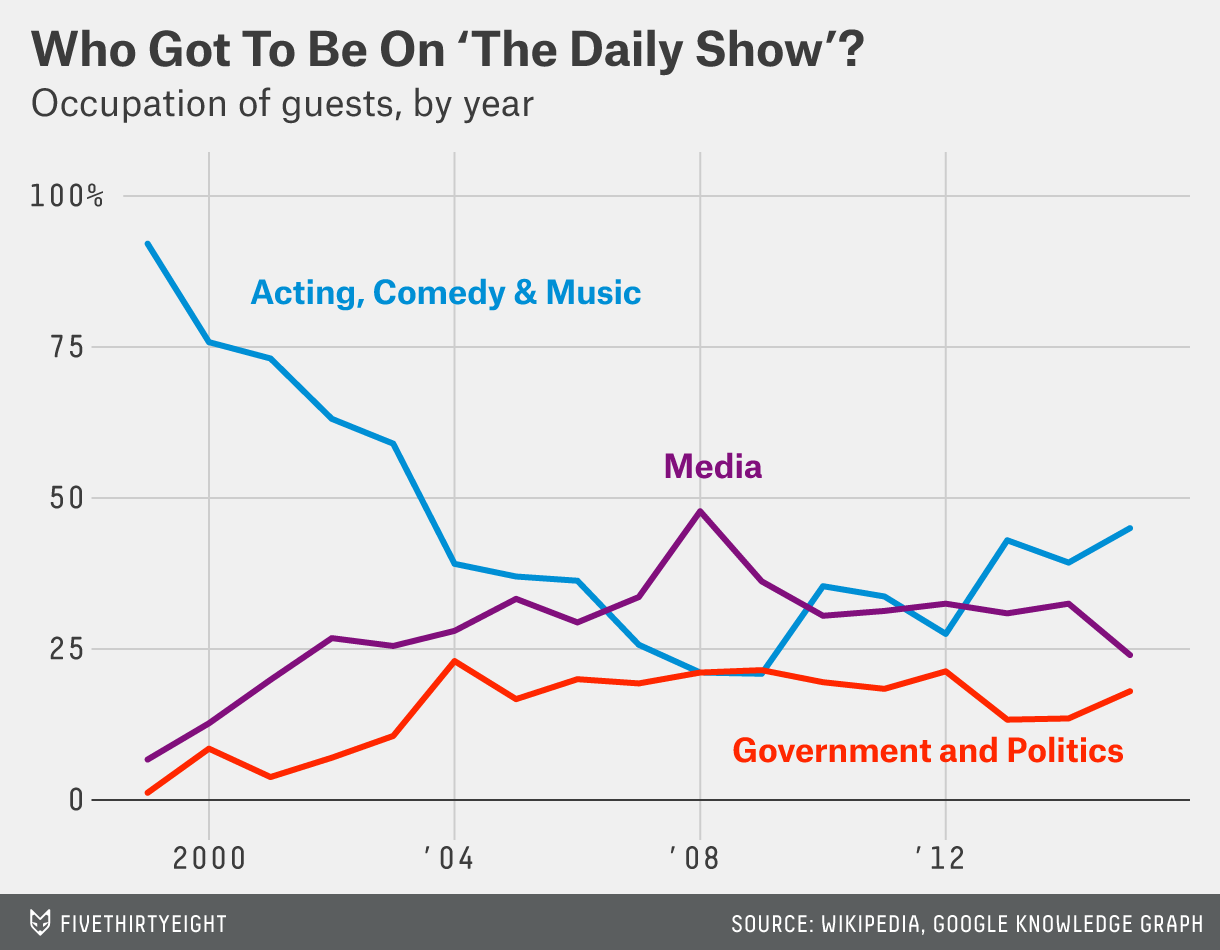

In [679]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

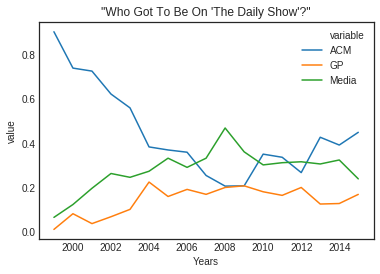

In [680]:
# !pip install seaborn
#Ran out of time to hit all the expectations but the most important stuff got in there
#Definitely not the best practices utilized either as far as using these\
#libraries go

line_plot = sns.lineplot(x='Years', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Years']))

title = line_plot.set_title('"Who Got To Be On \'The Daily Show\'?"')


plt.show()
